### Import all packages and set plots to be embedded inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

### DATA ASSESSING

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.sample(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
8148,-dz2h55a0SdnBJEXQm9CAQ,2012-08-01,mDDw5KvbJbkMWEUsrKy37A,5,Let me preface this story with the fact that i...,review,6prHhofQ3sLSNHJRYUat-Q,0,0,0
5762,jsblnIZnHUQGufwVb_yX6g,2008-09-20,sEldANfgLR4_SAwchsTENw,3,Probably more worthy of 3.5 stars. Damn the Y...,review,wHg1YkCzdZq9WBJOTRgxHQ,3,4,3
403,bO2rQLEntQLcg675LjEqaA,2009-04-03,OBRGsiB-FjLoZewGXtEQ5A,3,Came here for lunch recently with active Yelpe...,review,KICFDhBX25ruK_iW6gLgTA,1,3,0
2834,Lfm0zMACRFYpUZR_xGMYAQ,2011-12-10,Wk8ta6FpCUduQ21bMzFZRA,5,Yummy yummy yummy! Absolutely loved it - kick ...,review,F6B-A5coQW7gGhi4sd_mkg,0,0,0
6042,xI0UZH734lJtm39DbLf-Bw,2011-10-27,9JX081oVLclNi2NHLL6kFg,5,I saw the reviews of this Arribas and thought ...,review,4yfFThiCAsazpVWDb1nlQw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


###  Exploratory Data Analysis

In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


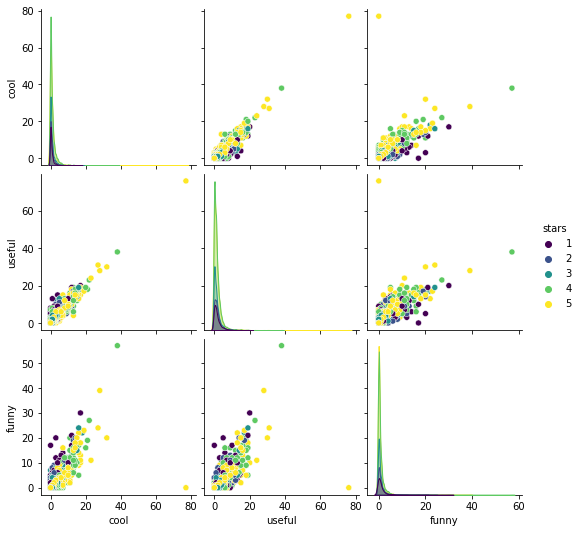

In [6]:
sns.pairplot(df,hue='stars',palette='viridis')

##### Create a new column called "text length" which is the number of words in the text column

In [7]:
df['text length'] = df['text'].apply(len)

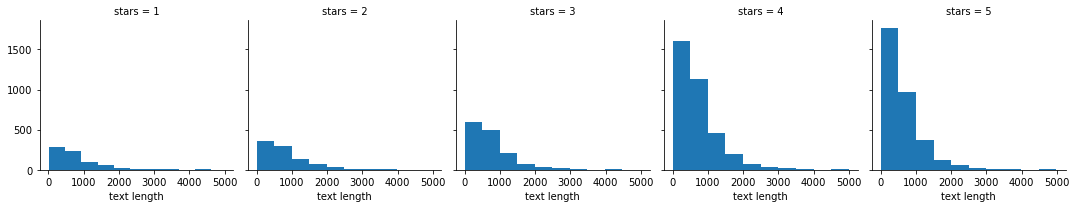

In [8]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

##### Create a countplot of star rating

<AxesSubplot:xlabel='stars', ylabel='count'>

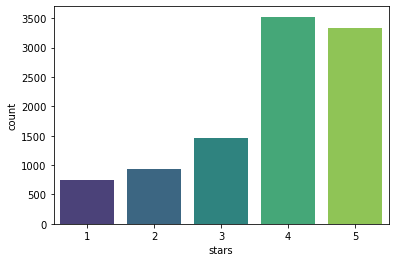

In [9]:
sns.countplot(x='stars',data=df,palette='viridis')

#### lets look at the distribution of some columns

(-3.85, 80.85)

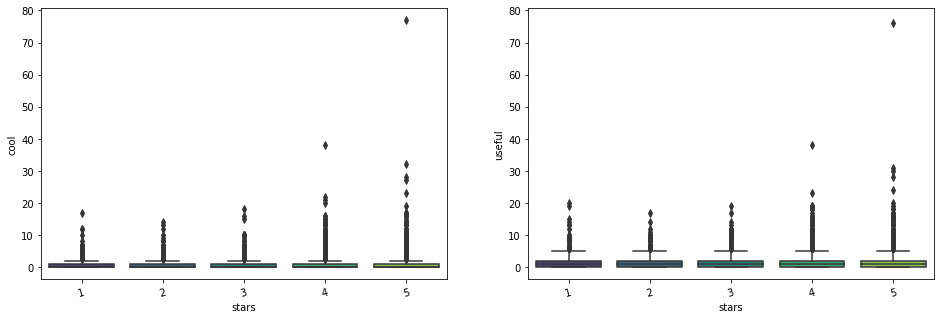

In [10]:
plt.figure(figsize = [16, 5])

# LEFT plot:
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.boxplot(x='stars',y='cool',data=df,palette='viridis')
plt.xticks(rotation=15);

# RIGHT plot:
plt.subplot(1, 2, 2)
sns.boxplot(x='stars',y='useful',data=df,palette='viridis')
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim())

In [11]:
#### create a new dataframe showing the mean values by star rating

df_stars = df.groupby('stars').mean()
df_stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot:>

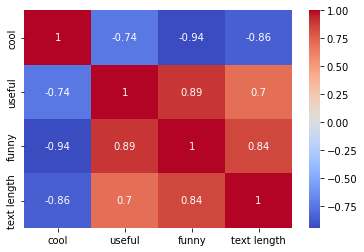

In [12]:
sns.heatmap(df_stars.corr(),cmap='coolwarm',annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [13]:
df_yelp = df[(df.stars==1) | (df.stars==5)]

## Data preprocessing  and model building

In [14]:
X = df_yelp['text']
y = df_yelp['stars']

In [15]:
# Split train_data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

### creating a pipeline

In [16]:
pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),    
])

In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [18]:
nlp_pred=pipe.predict(X_test)

## model evaluation

In [19]:
print(classification_report(y_test,nlp_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\qoyyum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\qoyyum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\qoyyum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
